In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import explore

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import scipy.stats as stats

import wrangle

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038959 entries, 10057 to 843328
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1038959 non-null  float64
 1   bathrooms   1038959 non-null  float64
 2   area        1038959 non-null  float64
 3   tax_value   1038959 non-null  float64
 4   year_built  1038959 non-null  float64
 5   taxamount   1038959 non-null  float64
 6   fips        1038959 non-null  float64
dtypes: float64(7)
memory usage: 63.4 MB


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [4]:
#Define the visualization function
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(1000), kind='reg', diag_kind='kde')

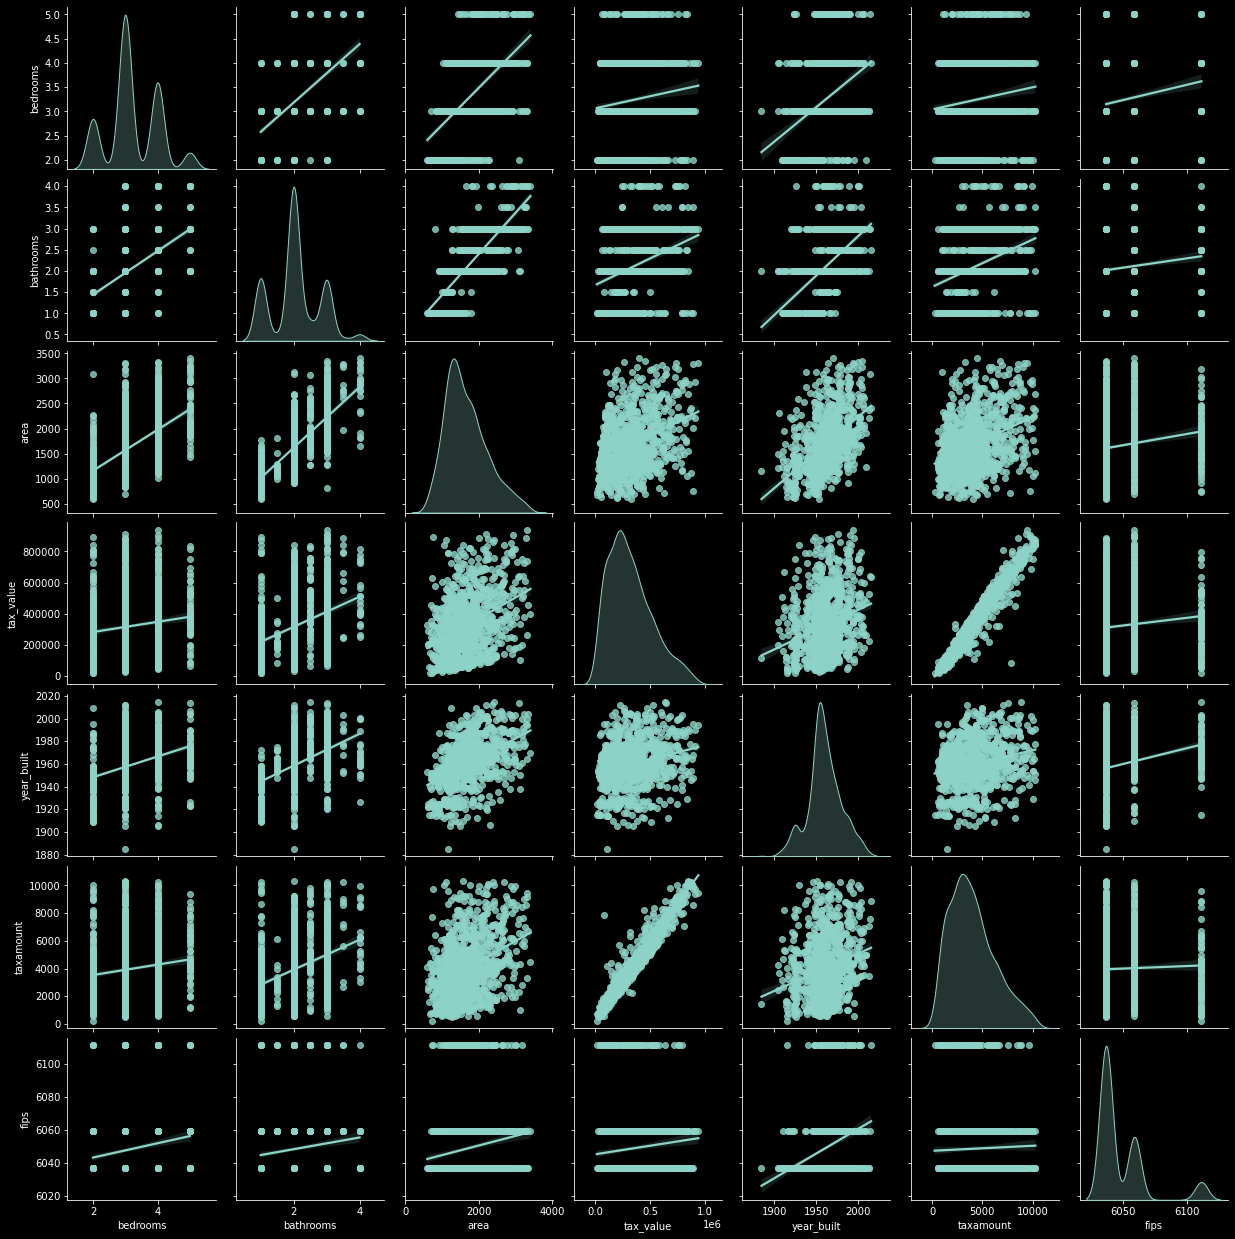

In [5]:
plot_variable_pairs(train)

### 4.Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [6]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(1000)
    plt.figure()
    sns.stripplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

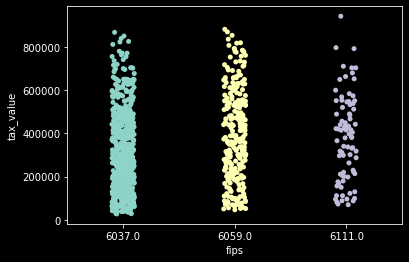

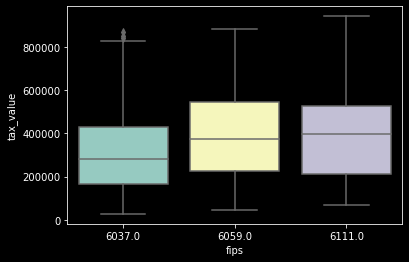

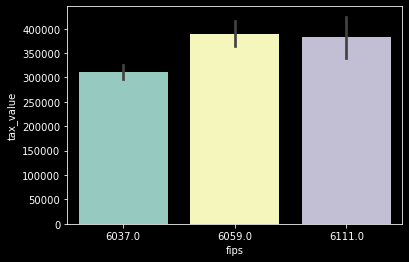

In [7]:
plot_categorical_and_continuous_vars(train, 'fips', 'tax_value')

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

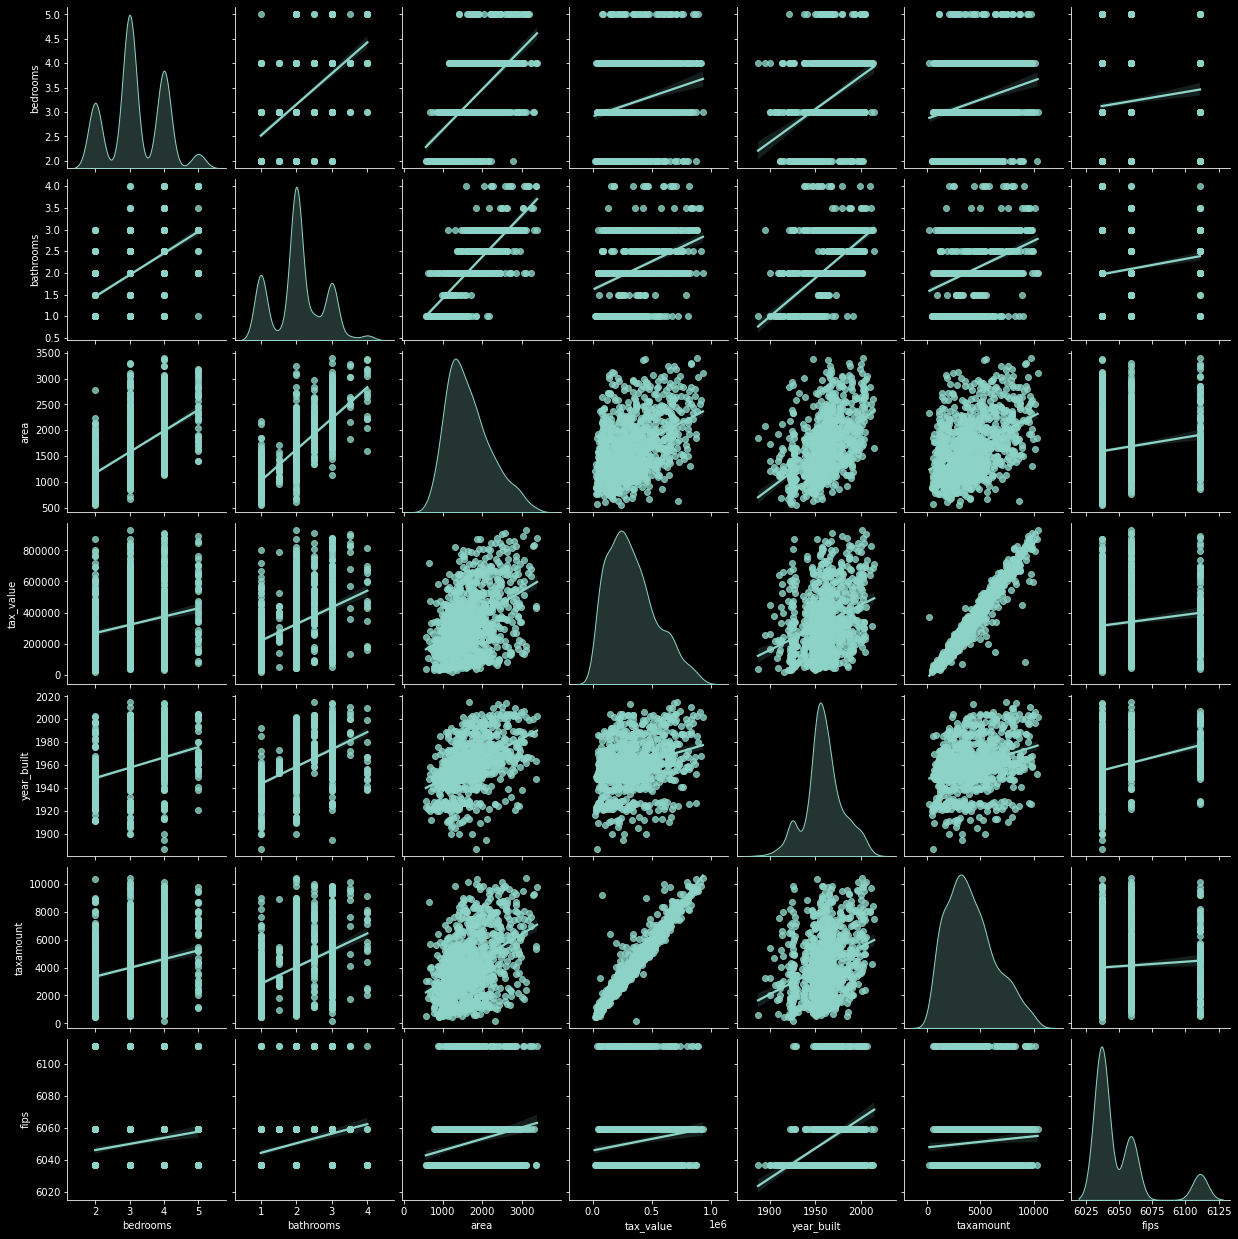

In [8]:
explore.plot_variable_pairs(train)

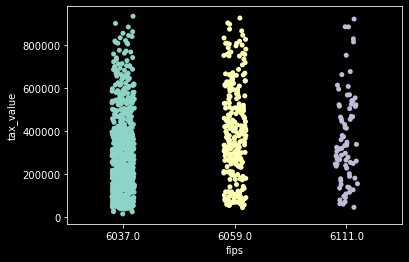

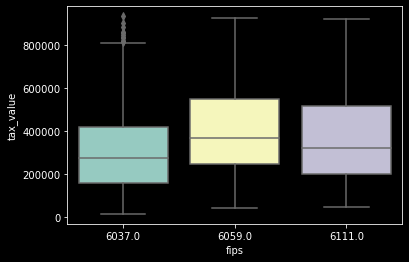

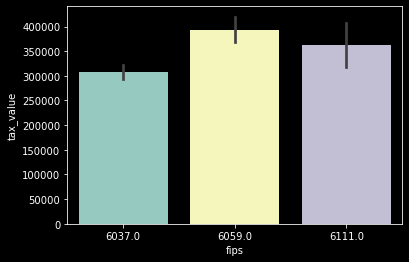

In [9]:
explore.plot_categorical_and_continuous_vars(train, 'fips', 'tax_value')

#### Takeaways
- Those with a fip of 6059 have a higher tax value than 6037 and 6111

### 8. Visualize all combinations of variables in some way.

In [10]:
zillow_corr = train.corr(method='spearman')
zillow_corr

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
bedrooms,1.000000,0.577489,0.606644,0.200128,0.411798,0.200003,0.190426
bathrooms,0.577489,1.000000,0.778073,0.354054,0.572778,0.351482,0.206212
area,0.606644,0.778073,1.000000,0.391546,0.494143,0.386517,0.200746
tax_value,0.200128,0.354054,0.391546,1.000000,0.245065,0.973164,0.169654
year_built,0.411798,0.572778,0.494143,0.245065,1.000000,0.239995,0.415716
taxamount,0.200003,0.351482,0.386517,0.973164,0.239995,1.000000,0.091556
fips,0.190426,0.206212,0.200746,0.169654,0.415716,0.091556,1.000000


<AxesSubplot:>

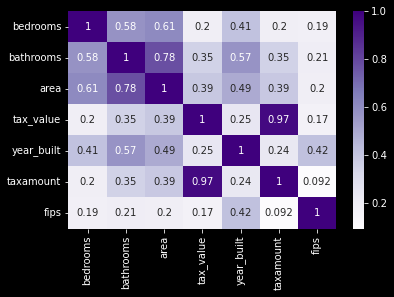

In [11]:
sns.heatmap(zillow_corr, cmap='Purples',annot=True)

### 9. Run the appropriate statistical tests where needed.

In [12]:
alpha = 0.05

r_bed, p_bed = stats.spearmanr(train.bedrooms, train.tax_value)

r_bath, p_bath = stats.spearmanr(train.bathrooms, train.tax_value)

r_area, p_area = stats.spearmanr(train.area, train.tax_value)

r_year_built, p_year_built = stats.spearmanr(train.year_built, train.tax_value)

r_taxamount, p_taxamount = stats.spearmanr(train.taxamount, train.tax_value)

r_fips, p_fips = stats.spearmanr(train.fips, train.tax_value)

In [13]:
if p_bed < alpha:
    print('The number of bedrooms is correlated with home value.')
else:
    print('The number of bedrooms is NOT correlated with home value.')   
    
if p_bath < alpha:
    print('The number of bathrooms is correlated with home value.')
else:
    print('The number of bathrooms is NOT correlated with home value.')
    
if p_area < alpha:
    print('The area of the house is correlated with home value.')
else:
    print('The area of the house is NOT correlated with home value.')
    
if p_year_built < alpha:
    print('The year the house was built is correlated with home value.')
else:
    print('The year the house was built is NOT correlated with home value.')

if p_taxamount < alpha:
    print('The tax amount is correlated with home value.')
else:
    print('The tax amount is NOT correlated with home value.')
    
if p_taxamount < alpha:
    print('The FIPS is correlated with home value.')
else:
    print('The FIPS is NOT correlated with home value.')

The number of bedrooms is correlated with home value.
The number of bathrooms is correlated with home value.
The area of the house is correlated with home value.
The year the house was built is correlated with home value.
The tax amount is correlated with home value.
The FIPS is correlated with home value.


### 10.What independent variables are correlated with the dependent variable, home value?